# Coursera Data Science Capstone Project

In [87]:
import numpy as np
import pandas as pd
%matplotlib inline

In [88]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## 1. Introduction/Business Problem
Car accidents happen everyday in cities. The seveiry of accidents may differ depending on the speed of the car, and the angle of collision. It would useful for enterprises such as insurance companies as well as government organizations to predict the seveiry of accidents given information about the accidents such as the road condition, weather condition, and the collision type etc, so they can prepare in advance according to the seveiry of accidents. In this project, we will be building a binary classifier to predict the severity of certain accidents. 

## 2. Data
The data we will be using for this project is the example dataset from SDOT Traffic Management Division, Traffic Records Group. This dataset contains features relative to car accidents such as the location, collision type, number of people involved in the accidents, weather condition, road condition and light condition etc. We have both numerical data and categorical data in this dataset. We will only select features of our interest to build the classification model. For for detailed description of the vairables, check the link down below: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

## 3. Methodology 

### Download Data File

In [17]:
import wget
url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
wget.download(url, 'Data-Collisions.csv')

'Data-Collisions (2).csv'

### Load Data From CSV File

In [89]:
name = 'Data-Collisions.csv'
df = pd.read_csv(name)
df.head()

/Users/Vincent/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df.shape

(194673, 38)

In [21]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

### Feature Analysis
For this dataset, we have a total of 38 variables. The 'SEVERITYCODE' variable is the target that we want to predict. In this part, we will determine what variables we are going to use for this project. As our gold is to predict the severity level of car accidents, information such as location, object ID and report number is not necessarily useful, therefore we will drop those variables.

In [90]:
features = ['SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE','SDOT_COLCODE', 
            'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
            'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR']
df = df[features]
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,Other,3,0,0,3,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


### Data Cleaning

For variables that cocntain 'Y' or 'N', we will replace 'Y' by integer 1, and replace 'N' by 0. For vairables INATTENTIONIND, PEDROWNOTGRNT,SPEEDING, we need to replace NaN by 0. 

In [91]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df["UNDERINFL"] = df["UNDERINFL"].astype(str).astype(int)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('N', 0, inplace = True)

In [92]:
df.isnull().sum()

SEVERITYCODE         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
INATTENTIONIND       0
UNDERINFL            0
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
HITPARKEDCAR         0
dtype: int64

In [93]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,0
4,2,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0


Since we have sufficient data size and discrete catecorical data can't be replaced by mean or median, we will drop those rows with NaN

In [94]:
df.dropna(axis = 0, inplace = True)
df.isnull().any().sum()

0

## Exploratory Analysis and Data Visualization

### Weather 

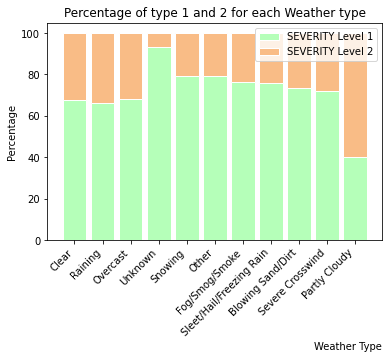

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
grp = df.groupby('SEVERITYCODE')
r = [0,1,2,3,4,5,6,7,8,9,10]
raw_data = {'greenBars': grp['WEATHER'].value_counts().values.tolist()[0:11], 'orangeBars': grp['WEATHER'].value_counts().values.tolist()[11:]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['WEATHER'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, rotation = 45, ha="right")
plt.xlabel('Weather Type', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for each Weather type')
plt.legend()
plt.show()

### Collision Type

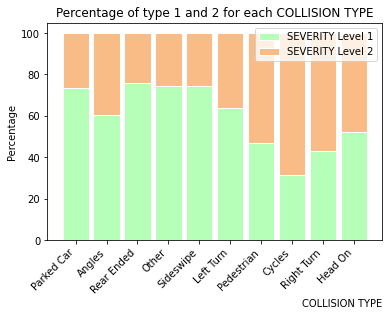

In [96]:
r = list(range(int(len(grp['COLLISIONTYPE'].value_counts().values)/2)))
raw_data = {'greenBars': grp['COLLISIONTYPE'].value_counts().values.tolist()[0:int(len(grp['COLLISIONTYPE'].value_counts().values)/2)], 'orangeBars': grp['COLLISIONTYPE'].value_counts().values.tolist()[int(len(grp['COLLISIONTYPE'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['COLLISIONTYPE'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, rotation = 45, ha="right")
plt.xlabel('COLLISION TYPE', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for each COLLISION TYPE')
plt.legend()
plt.show()

### Road Condition

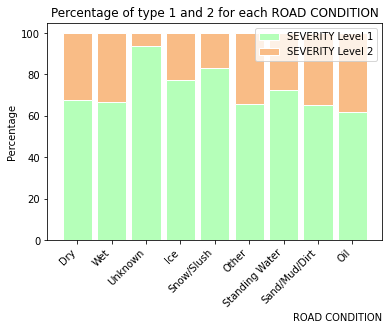

In [97]:
r = list(range(int(len(grp['ROADCOND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['ROADCOND'].value_counts().values.tolist()[0:int(len(grp['ROADCOND'].value_counts().values)/2)], 'orangeBars': grp['ROADCOND'].value_counts().values.tolist()[int(len(grp['ROADCOND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['ROADCOND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, rotation = 45, ha="right")
plt.xlabel('ROAD CONDITION', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for each ROAD CONDITION')
plt.legend()
plt.show()

### Light Condition

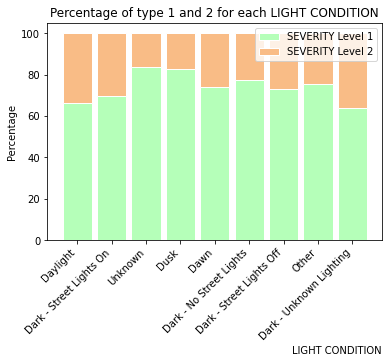

In [98]:
r = list(range(int(len(grp['LIGHTCOND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['LIGHTCOND'].value_counts().values.tolist()[0:int(len(grp['LIGHTCOND'].value_counts().values)/2)], 'orangeBars': grp['LIGHTCOND'].value_counts().values.tolist()[int(len(grp['LIGHTCOND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['LIGHTCOND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, rotation = 45, ha="right")
plt.xlabel('LIGHT CONDITION', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for each LIGHT CONDITION')
plt.legend()
plt.show()

### Under Influence

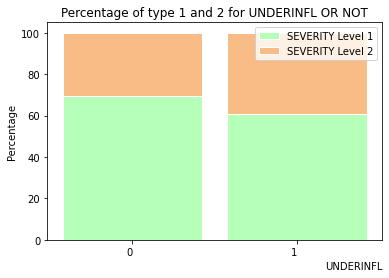

In [106]:
r = list(range(int(len(grp['UNDERINFL'].value_counts().values)/2)))
raw_data = {'greenBars': grp['UNDERINFL'].value_counts().values.tolist()[0:int(len(grp['UNDERINFL'].value_counts().values)/2)], 'orangeBars': grp['UNDERINFL'].value_counts().values.tolist()[int(len(grp['UNDERINFL'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['UNDERINFL'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('UNDERINFL', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for UNDERINFL OR NOT')
plt.legend()
plt.show()

### Speeding

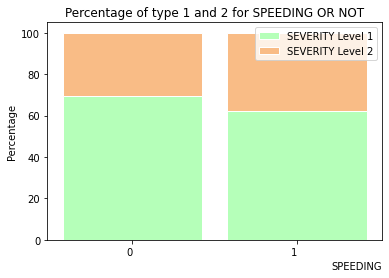

In [100]:
r = list(range(int(len(grp['SPEEDING'].value_counts().values)/2)))
raw_data = {'greenBars': grp['SPEEDING'].value_counts().values.tolist()[0:int(len(grp['SPEEDING'].value_counts().values)/2)], 'orangeBars': grp['SPEEDING'].value_counts().values.tolist()[int(len(grp['SPEEDING'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['SPEEDING'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('SPEEDING', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for SPEEDING OR NOT')
plt.legend()
plt.show()

### Inattention

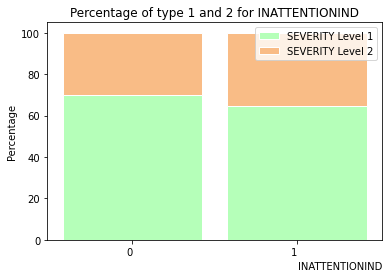

In [105]:
r = list(range(int(len(grp['INATTENTIONIND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['INATTENTIONIND'].value_counts().values.tolist()[0:int(len(grp['INATTENTIONIND'].value_counts().values)/2)], 'orangeBars': grp['INATTENTIONIND'].value_counts().values.tolist()[int(len(grp['INATTENTIONIND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['INATTENTIONIND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('INATTENTIONIND', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for INATTENTIONIND')
plt.legend()
plt.show()

## Data Preperation for Modeling

### Transform Categorical Variables

In [43]:
df_cat = df[['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
dummies = pd.get_dummies(df_cat)
df = pd.concat([df, dummies], axis=1)
df.drop(['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1, inplace = True)

In [45]:
df.columns.values

array(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly 

### Balance Dataset

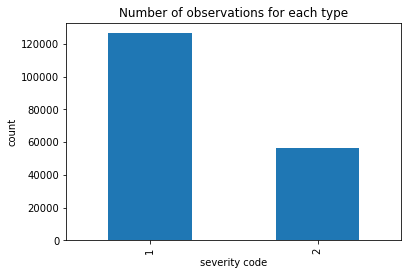

In [53]:
df['SEVERITYCODE'].value_counts().plot(kind = 'bar')
plt.xlabel('severity code')
plt.ylabel('count')
plt.title('Number of observations for each type')
plt.show()

Since we have unblanced data sample, also the size of this dataset is sufficient enough for us to build a classification model, we will use undersampling to balance the data. We will randomly select samples from group with SEVERITYCODE = 1 and merge them with all samples from group with SEVERITYCODE = 2. 

In [55]:
shuffled_df = df.sample(frac=1,random_state=4)
code_2 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]
code_1 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=56656,random_state=42)
balanced_df = pd.concat([code_1, code_2])
balanced_df['SEVERITYCODE'].value_counts()

2    56656
1    56656
Name: SEVERITYCODE, dtype: int64

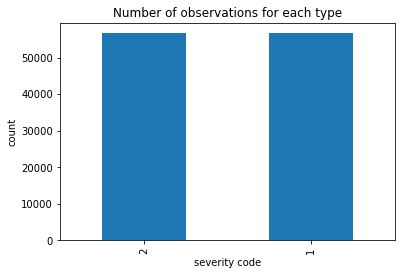

In [60]:
balanced_df['SEVERITYCODE'].value_counts().plot(kind = 'bar')
plt.xlabel('severity code')
plt.ylabel('count')
plt.title('Number of observations for each type')
plt.show()

### Normalize Data

In [62]:
from sklearn import preprocessing
X = balanced_df.loc[:, 'PERSONCOUNT':].values.astype(float)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.38423393, -0.23981582, -0.21531145, ..., -0.1820257 ,
        -0.03187363, -0.21635729],
       [-0.38423393, -0.23981582, -0.21531145, ..., -0.1820257 ,
        -0.03187363, -0.21635729],
       [ 1.71049851, -0.23981582, -0.21531145, ..., -0.1820257 ,
        -0.03187363, -0.21635729],
       ...,
       [-0.38423393,  3.7788193 , -0.21531145, ..., -0.1820257 ,
        -0.03187363, -0.21635729],
       [ 0.31401021, -0.23981582, -0.21531145, ..., -0.1820257 ,
        -0.03187363, -0.21635729],
       [ 2.40874266, -0.23981582,  4.567549  , ..., -0.1820257 ,
        -0.03187363, -0.21635729]])

In [63]:
y = balanced_df['SEVERITYCODE'].values
y

array([1, 1, 1, ..., 2, 2, 2])

## Classification

### K Nearest Neighbor(KNN)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [67]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [69]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
jac_knn = jaccard_score(y_test, neigh.predict(X_test))
f1_knn = f1_score(y_test, neigh.predict(X_test), average='weighted')
print("Jaccard similarity score: ", jac_knn)
print("F1 score: ", f1_knn)

Jaccard similarity score:  0.5076495132127955
F1 score:  0.6870505604837266


### Dicision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
jac_dt = jaccard_score(y_test, dt.predict(X_test))
f1_dt = f1_score(y_test, dt.predict(X_test), average='weighted')
print("Jaccard similarity score: ", jac_dt)
print("F1 score: ", f1_dt)

Jaccard similarity score:  0.5025276165512076
F1 score:  0.686443703446778


### Support Vector Machine (SVM)

In [74]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [76]:
jac_svm = jaccard_score(y_test, clf.predict(X_test))
f1_svm = f1_score(y_test, clf.predict(X_test), average='weighted')
print("Jaccard similarity score: ", jac_svm)
print("F1 score: ", f1_svm)

Jaccard similarity score:  0.5133539771627637
F1 score:  0.7023060017059267


### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

In [78]:
from sklearn.metrics import log_loss
jac_lr = jaccard_score(y_test, LR.predict(X_test))
f1_lr = f1_score(y_test, LR.predict(X_test), average='weighted')
print("Jaccard similarity score: ", jac_lr)
print("F1 score: ", f1_lr)
yhat_prob = LR.predict_proba(X_test)
ll_LR = log_loss(y_test, yhat_prob)
print("Log Loss: ", ll_LR)

Jaccard similarity score:  0.49931129476584024
F1 score:  0.6974652705987167
Log Loss:  0.5455539840355568


## 4. Results

In [79]:
thisdict = {
  "Algorithm": ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
  "Jaccard": [jac_knn, jac_dt, jac_svm, jac_lr],
  "F1-score": [f1_knn, f1_dt, f1_svm, f1_lr],
  'LogLoss':['NA', 'NA', 'NA', ll_LR]
}
pd.DataFrame(thisdict)

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.507650,0.687051,NA
1,Decision Tree,0.502528,0.686444,NA
2,SVM,0.513354,0.702306,NA
3,LogisticRegression,0.499311,0.697465,0.545554


## 5. Discussion

From the plots in the exploratory section we can clearly see that features such as light condition, weather type, and light condition do have a impact on the possibility of more severe accidents happening. Features such as speeding, and driving under influence can also increase the chance of getting into a severe accidents. 

## 6. Conclussion

From the Evaluation matrix above we can see that Support Vector Machine algorithm has the highest F-1score as well as highest Jaccard similarity score among all algorithms. Therefore SVM will be the model that we are going to choose for further optimization of the classifier. 